In [7]:
import pandas as pd
import seaborn as sns

# Carregar dades

In [8]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [9]:
print(df["species"].unique())
print(df["island"].unique())
print(df["sex"].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female' nan]


In [10]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64


<Axes: >

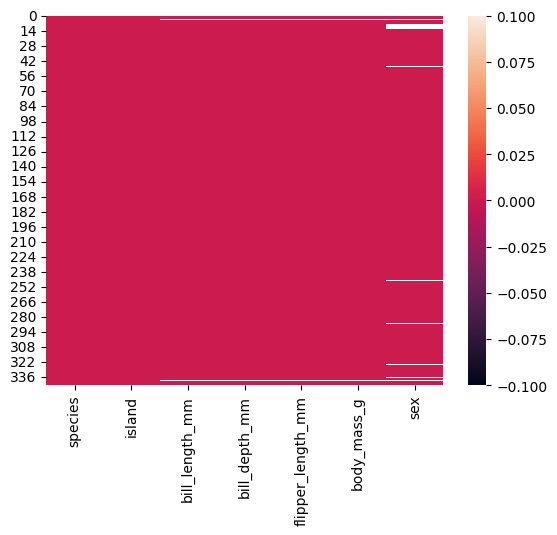

In [11]:
print(df.count())
sns.heatmap(df.isna(), mask=df.isna())

In [12]:
# Eliminar les files que tenen NaN en qualsevol columna
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Preparam les dades

In [16]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=1)
y_train = df_train.species.values
y_val = df_val.species.values

del df_train['species']
del df_val['species']

df_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
136,Dream,35.6,17.5,191.0,3175.0,Female
158,Dream,46.1,18.2,178.0,3250.0,Female
298,Biscoe,45.2,13.8,215.0,4750.0,Female
83,Torgersen,35.1,19.4,193.0,4200.0,Male
45,Dream,39.6,18.8,190.0,4600.0,Male


In [17]:
# Definir las columnas categóricas y numéricas
categorical = ['island', 'sex']  # Asegúrate de separar las columnas 'island' y 'sex'
numerical = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train[numerical])
df_train[numerical] = scaler.transform(df_train[numerical])
df_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
136,Dream,-1.485278,0.189826,-0.718241,-1.261607,Female
158,Dream,0.417254,0.540232,-1.625947,-1.170910,Female
298,Biscoe,0.254180,-1.662317,0.957524,0.643033,Female
83,Torgersen,-1.575875,1.140927,-0.578594,-0.022080,Male
45,Dream,-0.760504,0.840579,-0.788064,0.461638,Male


In [19]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')  
train_dict[0] 

{'island': 'Dream',
 'sex': 'Female',
 'bill_length_mm': -1.485278079541803,
 'bill_depth_mm': 0.18982641013085988,
 'flipper_length_mm': -0.7182408816341204,
 'body_mass_g': -1.2616073576192994}

In [20]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train[0]  

array([ 0.18982641, -1.48527808, -1.26160736, -0.71824088,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ])

In [21]:
dv.get_feature_names_out()

array(['bill_depth_mm', 'bill_length_mm', 'body_mass_g',
       'flipper_length_mm', 'island=Biscoe', 'island=Dream',
       'island=Torgersen', 'sex=Female', 'sex=Male'], dtype=object)

In [22]:
def transformar_dades(X):
    X[numerical] = scaler.transform(X[numerical])
    X_dict = X[categorical + numerical].to_dict(orient='records') 
    return dv.transform(X_dict)

# LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [24]:
X_val = transformar_dades(df_val)
X_val[0]

array([ 0.39005812, -1.59399421, -0.92905119, -0.78806441,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ])

In [25]:
y_pred = lr_model.predict(X_val)
y_pred

array(['Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       '

In [26]:
def comparar_predicions(y_pred, y_val):
    comparar = pd.DataFrame(list(zip(y_pred, y_val)), columns=['y_pred','y_val'])
    comparar["correct"] = comparar.apply(lambda x: 1 if x.y_pred==x.y_val else 0, axis=1)
    print(f"{round((comparar.correct.mean())*100, 3)}% d'accert")
    return comparar

In [27]:
comparar_predicions(y_pred, y_val)

98.864% d'accert


,y_pred,y_val,correct
0,Adelie,Adelie,1
1,Adelie,Adelie,1
2,Gentoo,Gentoo,1
3,Chinstrap,Chinstrap,1
4,Chinstrap,Chinstrap,1
...,...,...,...
83,Adelie,Adelie,1
84,Gentoo,Gentoo,1
85,Adelie,Adelie,1
86,Gentoo,Gentoo,1


# SVM

In [28]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [29]:
y_pred = svc_model.predict(X_val)
y_pred

array(['Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       '

In [30]:
comparar_predicions(y_pred, y_val)

98.864% d'accert


,y_pred,y_val,correct
0,Adelie,Adelie,1
1,Adelie,Adelie,1
2,Gentoo,Gentoo,1
3,Chinstrap,Chinstrap,1
4,Chinstrap,Chinstrap,1
...,...,...,...
83,Adelie,Adelie,1
84,Gentoo,Gentoo,1
85,Adelie,Adelie,1
86,Gentoo,Gentoo,1


# Camprara els models

In [31]:
df_test
y_test = df_test.species.values
del df_test['species']

In [32]:
X_test = transformar_dades(df_test)

In [ ]:
y_pred = svc_model.predict(X_test)
comparar_predicions(y_pred, y_test)

100.0% d'accert


,y_pred,y_val,correct
0,Adelie,Adelie,1
1,Gentoo,Gentoo,1
2,Chinstrap,Chinstrap,1
3,Chinstrap,Chinstrap,1
4,Gentoo,Gentoo,1
...,...,...,...
62,Gentoo,Gentoo,1
63,Adelie,Adelie,1
64,Adelie,Adelie,1
65,Adelie,Adelie,1


: 

: 

: 

In [33]:
# Importar el árbol de decisión de sklearn
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier()

# Ajustar el modelo con tus datos de entrenamiento
model.fit(X_train, y_train)  # X_train y y_train son tus datos de entrada y etiquetas

# Hacer predicciones con el modelo
predictions = model.predict(X_test)  # X_test son los datos de prueba

# Evaluar el modelo (por ejemplo, usando la precisión)
accuracy = model.score(X_test, y_test)  # X_test y y_test son tus datos de prueba y etiquetas reales
print(f"Precisión del modelo: {accuracy}")


Precisión del modelo: 0.9850746268656716


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definir el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el valor de k según sea necesario

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Hacer predicciones con los datos de validación
y_pred = knn_model.predict(X_val)

# Calcular la precisión usando accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print(f"Precisión del modelo KNN: {accuracy * 100:.2f}%")

# O también puedes usar el método score() que te devuelve la precisión directamente
score = knn_model.score(X_val, y_val)
print(f"Precisión del modelo KNN usando score(): {score * 100:.2f}%")

Precisión del modelo KNN: 100.00%
Precisión del modelo KNN usando score(): 100.00%
